In [270]:
# import libraries

import pandas as pd
import numpy as np
from statistics import geometric_mean

import seaborn as sns
import matplotlib.pyplot as plt

In [196]:
# import result sets
df_nocuts = pd.read_csv("results_0.csv")
df_cuts = pd.read_csv("results_1.csv")

In [197]:
# keep instances that are solved for each of the five random seeds
max_repeat = 5
count_nocuts = df_nocuts['NAME'].value_counts()
count_cuts = df_cuts['NAME'].value_counts()
df_nocuts = df_nocuts[df_nocuts['NAME'].isin(count_nocuts[count_nocuts == max_repeat].index)]
df_cuts = df_cuts[df_cuts['NAME'].isin(count_cuts[count_cuts == max_repeat].index)]

# keep instances that are solved by both cut settings 
df_nocuts_new = df_nocuts.loc[df_nocuts.NAME.isin(df_cuts.NAME)]
df_cuts_new = df_cuts.loc[df_cuts.NAME.isin(df_nocuts.NAME)]

# 642 instances * 5 
print(df_cuts_new.shape)
print(df_nocuts_new.shape)

(3210, 18)
(3210, 18)


In [198]:
# check if total instances in both settings are same
total_instances = 0
if len(df_cuts_new) == len(df_nocuts_new):
    total_instances += len(df_cuts_new)

print('Total instances:', total_instances)

# General Statistics
solved_cuts = df_cuts_new[(df_cuts_new["SOLUTION TIME"] < 18000)]
solved_nocuts = df_nocuts_new[(df_nocuts_new["SOLUTION TIME"] < 18000)]

unsolved_cuts = df_cuts_new[(df_cuts_new["SOLUTION TIME"] >= 18000)]
unsolved_nocuts = df_nocuts_new[(df_nocuts_new["SOLUTION TIME"] >= 18000)]


print('Instances Solved Using Cuts:', len(solved_cuts))
print('Instances Solved Using No Cuts:', len(solved_nocuts))

print('Instances Unsolved Using Cuts:', len(unsolved_cuts))
print('Instances Unsolved Using No Cuts:', len(unsolved_nocuts))

print('\n')

print('Percentage of Instances Solved Using Cuts:', (len(solved_cuts) / total_instances)*100)
print('Percentage of Instances Solved Using No Cuts:', (len(solved_nocuts) / total_instances)*100)

print('Percentage of Instances Unsolved Using Cuts:', (len(unsolved_cuts) / total_instances)*100)
print('Percentage of Instances Unsolved Using No Cuts:', (len(unsolved_nocuts) / total_instances)*100)

print('\n')

df_merged = df_cuts_new.merge(df_nocuts_new, on = ['NAME', 'RANDOM SEED'], how = 'left')

solved_both = df_merged[(df_merged['SOLUTION TIME_x'] < 18000) & (df_merged['SOLUTION TIME_y'] < 18000)]
print('Instances Solved for both settings:', len(solved_both))
solved_both
unsolved_both = df_merged[(df_merged['SOLUTION TIME_x'] >= 18000) & (df_merged['SOLUTION TIME_y'] >= 18000)]
print('Instances Unsolved for both settings:', len(unsolved_both))

solved_cuts = df_merged[(df_merged['SOLUTION TIME_x'] < 18000) & (df_merged['SOLUTION TIME_y'] >= 18000)]
print('Instances Solved for Cuts but not for No Cuts:', len(solved_cuts))

solved_nocuts = df_merged[(df_merged['SOLUTION TIME_x'] >= 18000) & (df_merged['SOLUTION TIME_y'] < 18000)]
print('Instances Solved for No Cuts but not for Cuts:', len(solved_nocuts))

print('\n')

print('Percentage of Instances Solved or Unsolved for both settings:', ((len(solved_both)+len(unsolved_both)) / total_instances)*100)
print('Percentage of Instances Solved by Cuts out of remaining instances:', ((len(solved_cuts) / (total_instances - (len(solved_both) + len(unsolved_both)))) * 100))
print('Percentage of Instances Solved by No Cuts out of remaining instances:', ((len(solved_nocuts) / (total_instances - (len(solved_both) + len(unsolved_both)))) * 100))

print('\n')

# Excluding instances that solve within 10% of the time of either settings
cuts_win = df_merged[(df_merged['SOLUTION TIME_x'] < 0.9 * df_merged['SOLUTION TIME_y'])]
nocuts_win = df_merged[(df_merged['SOLUTION TIME_y'] < 0.9 * df_merged['SOLUTION TIME_x'])]

print('Cuts Outperform No Cuts:', len(cuts_win))
print('No Cuts Outperform Cuts:', len(nocuts_win))
print('Percentage Cuts Outperforms:', (len(cuts_win) / total_instances)*100)
print('Percentage No Cuts Outperforms:', (len(nocuts_win) / total_instances)*100)

Total instances: 3210
Instances Solved Using Cuts: 2041
Instances Solved Using No Cuts: 1855
Instances Unsolved Using Cuts: 1169
Instances Unsolved Using No Cuts: 1355


Percentage of Instances Solved Using Cuts: 63.58255451713396
Percentage of Instances Solved Using No Cuts: 57.78816199376947
Percentage of Instances Unsolved Using Cuts: 36.41744548286604
Percentage of Instances Unsolved Using No Cuts: 42.21183800623053


Instances Solved for both settings: 1778
Instances Unsolved for both settings: 1092
Instances Solved for Cuts but not for No Cuts: 263
Instances Solved for No Cuts but not for Cuts: 77


Percentage of Instances Solved or Unsolved for both settings: 89.40809968847351
Percentage of Instances Solved by Cuts out of remaining instances: 77.3529411764706
Percentage of Instances Solved by No Cuts out of remaining instances: 22.647058823529413


Cuts Outperform No Cuts: 992
No Cuts Outperform Cuts: 775
Percentage Cuts Outperforms: 30.903426791277262
Percentage No Cuts Outperf

In [199]:
# Geometric Shifted Mean for Time and Nodes
SHIFT_TIME = 60
SHIFT_NODES = 1000

df = [df_cuts_new, df_nocuts_new]
# cut_setting = [cuts, nocuts]
time = []
nodes = []
for data in df:
    time_ = data['SOLUTION TIME'].tolist()
    timeshift = [i + SHIFT_TIME for i in time_]
    time_geom = geometric_mean(timeshift) - SHIFT_TIME
    time.append(time_geom)
    
    nodes_ = data['No. OF NODES'].tolist()
    nodeshift = [i + SHIFT_NODES for i in nodes_]
    nodes_geom = geometric_mean(nodeshift) - SHIFT_NODES
    nodes.append(nodes_geom)
    
print(time)  
print(nodes)

print('Cuts is faster than No Cuts by (%):', 
      ((time[1] - time[0]) / time[1])*100)
print('Cuts explores fewer nodes than No Cuts by (%):', 
      ((nodes[1] - nodes[0]) / nodes[1])*100)
pd.set_option('display.max_columns', None)

[1389.583626428008, 1778.711039231674]
[7795.388344714367, 19812.47719075887]
Cuts is faster than No Cuts by (%): 21.876932465194127
Cuts explores fewer nodes than No Cuts by (%): 60.654146022939685


CREATING SETS:

SET 1: All runs of each instance solves before the timeout i.e. solve before 18000s

SET 2: At least one and at most 9 runs of each instance timeout

SET 3: Union of SETS 1 and 2

In [200]:
# SET 1

vc = solved_both['NAME'].value_counts()
analysis_set_1 = solved_both[solved_both['NAME'].isin(vc[vc == max_repeat].index)]

analysis_set_1 = analysis_set_1[['NAME', "RANDOM SEED", "SOLUTION TIME_x", "No. OF NODES_x", "SOLUTION TIME_y", "No. OF NODES_y"]]
analysis_set_1.rename(columns={'SOLUTION TIME_x': 'TIME W/ CUTS', 'No. OF NODES_x': 'NODES W/ CUTS', 
                               'SOLUTION TIME_y': 'TIME W/O CUTS', 'No. OF NODES_y': 'NODES W/O CUTS' }, inplace=True)
analysis_set_1['Minimum Time'] = analysis_set_1[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis_set_1['Minimum Nodes'] = analysis_set_1[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

# analysis_set_1

In [201]:
# Splitting the instances into buckets 
df_0 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 0)]
df_10 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 10)]
df_100 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 100)]
df_1000 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 1000)]
df_3600 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 3600)]

In [202]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
n_cuts = []
n_nocuts = []
n_perfect = []
instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    time_shift_perfect = [i + SHIFT_TIME for i in time_perfect]
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(time_shift_perfect) - SHIFT_TIME
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    
    instances.append(len(data))

In [203]:
bb_classes = ['Geometric Mean']
num_bb_classes = len(bb_classes)

bucket_min = [0, 10, 100, 1000, 3600]
bucket_max = [18000, 18000, 18000, 18000, 18000]
num_buckets = len(bucket_min)
assert(len(bucket_max) == num_buckets)
bb_buckets = ['[' + str(bucket_min[j]) + ',' + str(bucket_max[j]) + ')' for j in range(num_buckets)]

bb_metrics = ['Gmean']

In [204]:
avg_bb_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut','No Cut', 'Perfect']],
                                    names=['Parameter','Setting'])

bb_row_names = pd.MultiIndex.from_product(
    [bb_classes, bb_buckets],
    names=['Metric', 'Bucket'])

avg_bb_df = pd.DataFrame(
    index = bb_row_names,
    dtype = float)

avg_bb_df = pd.DataFrame(
    columns = avg_bb_cols,
    index = bb_row_names,
    dtype = float)

avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts
avg_bb_df[('Time', 'Perfect')] = t_perfect
avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts
avg_bb_df[('Node', 'Perfect')] = n_perfect


avg_bb_df

Parameter                           Time                            \
Setting                              Cut       No Cut      Perfect   
Metric         Bucket                                                
Geometric Mean [0,18000)      196.627866   244.701124   152.423256   
               [10,18000)     368.163497   443.639538   273.618091   
               [100,18000)    920.036004  1047.461767   670.656853   
               [1000,18000)  3375.654161  3727.537136  2383.116172   
               [3600,18000)  7925.674500  9652.217131  6768.692186   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      3106.453952    7967.012311   2735.949945   
               [10,18000)     5605.053776   13840.151057   4807.364567   
               [100,18000)   10451.995680   21944.524800   8864.719143   
               [1000,18000)  47434.682145  100956.239613  37833.947697   
               [3600,18000)  92018.347853  192284.003111  73627.442382   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)         1775  
               [10,18000)        1295  
               [100,18000)        790  
               [1000,18000)       277  
               [3600,18000)        70

In [205]:
# SET 2
set_2 = pd.concat([df_cuts_new, df_nocuts_new])
set_2 = set_2.sort_values(by = ['NAME', 'CUT SETTING'], ascending = True)


counts = set_2['NAME'].value_counts()
res = set_2[~set_2['NAME'].isin(counts[counts < 10].index)]

dic = dict()
for index, row in res.iterrows():
    if row['SOLUTION TIME'] > 18000:
        if row['NAME'] in dic:
            dic[row['NAME']] += 1
        else:
            dic[row["NAME"]] = 1
        if dic[row['NAME']] == 10:
            del dic[row['NAME']]
# dic
set_2_nocuts = df_nocuts_new[df_nocuts_new['NAME'].isin(dic.keys())]
set_2_cuts = df_cuts_new[df_cuts_new['NAME'].isin(dic.keys())]

analysis_set_2 = set_2_cuts.merge(set_2_nocuts, on = ['NAME', 'RANDOM SEED'], how = 'left')
analysis_set_2 = analysis_set_2[['NAME', "RANDOM SEED", "SOLUTION TIME_x", "No. OF NODES_x", "SOLUTION TIME_y", "No. OF NODES_y"]]
analysis_set_2.rename(columns={'SOLUTION TIME_x': 'TIME W/ CUTS', 'No. OF NODES_x': 'NODES W/ CUTS', 
                               'SOLUTION TIME_y': 'TIME W/O CUTS', 'No. OF NODES_y': 'NODES W/O CUTS' }, inplace=True)
analysis_set_2['Minimum Time'] = analysis_set_2[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis_set_2['Minimum Nodes'] = analysis_set_2[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

In [206]:
factor = 1
time_cuts = []
time_nocuts = []
for index, row in analysis_set_2.iterrows():
    if row['TIME W/ CUTS'] >= 18000:
        time_cuts.append(row['TIME W/ CUTS'] * factor)
    else:
        time_cuts.append(row['TIME W/ CUTS'])
        
    if row['TIME W/O CUTS'] >= 18000:
        time_nocuts.append(row['TIME W/O CUTS'] * factor)
    else:
        time_nocuts.append(row['TIME W/O CUTS'])

analysis_set_2['TIME W/ CUTS'] = time_cuts
analysis_set_2['TIME W/O CUTS'] = time_nocuts

In [207]:
df_0 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 0)]
df_10 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 10)]
df_100 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 100)]
df_1000 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 1000)]
df_3600 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 3600)]

In [208]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
n_cuts = []
n_nocuts = []
n_perfect = []
instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    time_shift_perfect = [i + SHIFT_TIME for i in time_perfect]
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(time_shift_perfect) - SHIFT_TIME
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    
    instances.append(len(data))

In [209]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts
avg_bb_df[('Time', 'Perfect')] = t_perfect
avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts
avg_bb_df[('Node', 'Perfect')] = n_perfect


avg_bb_df

Parameter                            Time                              \
Setting                               Cut        No Cut       Perfect   
Metric         Bucket                                                   
Geometric Mean [0,18000)      3814.294037  14038.063619   2964.738109   
               [10,18000)     4309.741767  13937.219625   3327.153601   
               [100,18000)    5806.952557  13661.295880   4398.096230   
               [1000,18000)  10034.873789  12916.914762   7194.816671   
               [3600,18000)  12489.353812  15126.886672  10495.230209   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)     22928.795314  214074.340194  18889.238633   
               [10,18000)    25234.752577  196755.553386  20689.357271   
               [100,18000)   30757.894555  160387.223813  24868.182779   
               [1000,18000)  48953.772332  133288.876654  38029.898803   
               [3600,18000)  62313.569287  154724.891897  49959.203633   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)          355  
               [10,18000)         345  
               [100,18000)        320  
               [1000,18000)       266  
               [3600,18000)       202

In [210]:
# Set 3

analysis_set_3 = pd.concat([analysis_set_1, analysis_set_2])
analysis_set_3 = analysis_set_3.sort_values(by = ['NAME', 'RANDOM SEED'], ascending = True)

analysis_set_3

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,Minimum Time,Minimum Nodes
0,10teams.mps.gz,2,11.088517,30,12.212530,276,11.088517,30
1,10teams.mps.gz,4,11.186637,30,12.444448,276,11.186637,30
2,10teams.mps.gz,8,11.044666,30,12.331489,276,11.044666,30
3,10teams.mps.gz,16,10.835616,30,12.467186,276,10.835616,30
4,10teams.mps.gz,32,10.833424,30,12.477946,276,10.833424,30
...,...,...,...,...,...,...,...,...
3195,wachplan.mps.gz,2,1427.930347,67520,1801.604630,98056,1427.930347,67520
3196,wachplan.mps.gz,4,1444.662760,67520,1804.842432,98056,1444.662760,67520
3197,wachplan.mps.gz,8,1431.659624,67520,1737.152014,98056,1431.659624,67520
3198,wachplan.mps.gz,16,1433.459125,67520,1758.587956,98056,1433.459125,67520


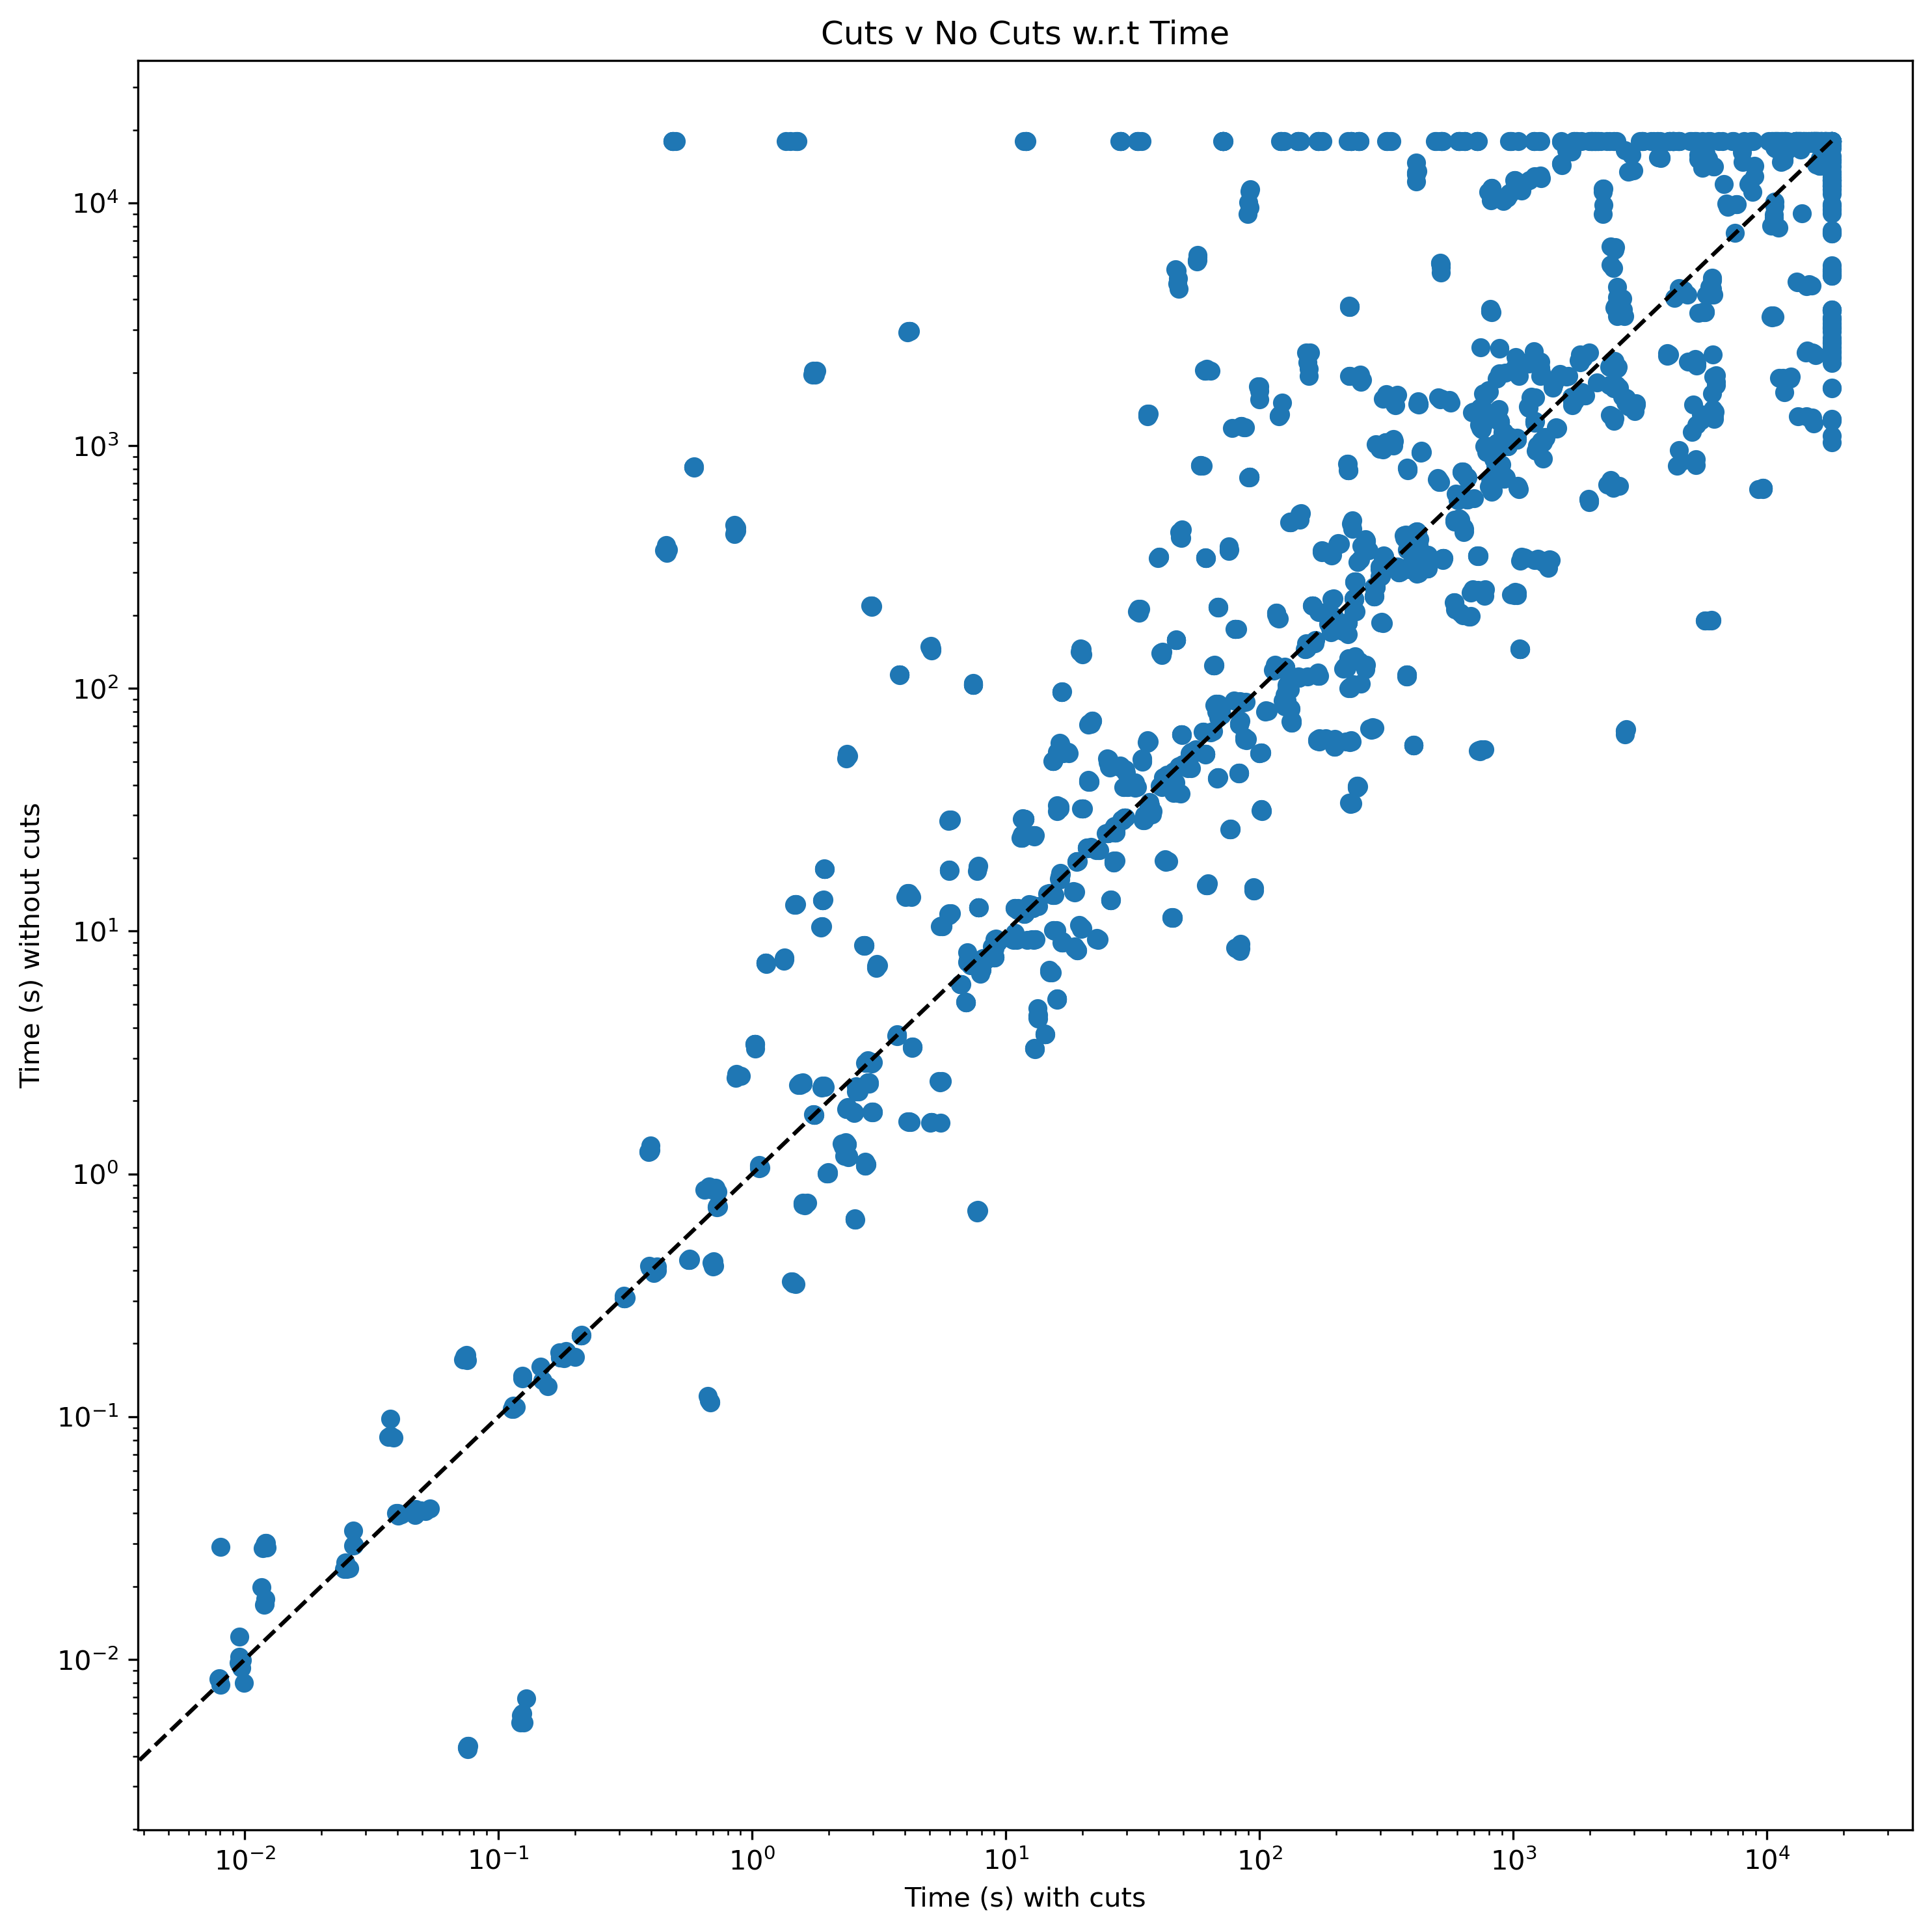

<Figure size 432x288 with 0 Axes>

In [283]:
minx = 0
maxx = 18000

plt.figure(figsize=(10, 10), dpi=300)
plt.scatter(x=analysis_set_3['TIME W/ CUTS'], y=analysis_set_3['TIME W/O CUTS'])
# plt.scatter(x=hard['TIME W/ CUTS'], y=hard['TIME W/O CUTS'])
# plt.legend(["easy" , "hard"], bbox_to_anchor = (1 , 1))

plt.plot(range(int(minx),int(maxx)),range(int(minx),int(maxx)),'--', color='black')

plt.title('Cuts v No Cuts w.r.t Time')
plt.xlabel('Time (s) with cuts')
plt.ylabel('Time (s) without cuts')



fig = plt.gcf()

ax_list=fig.axes
ax=ax_list[0]
ax.set_xscale("log")
ax.set_yscale("log")
plt.tight_layout()
plt.show()
plt.draw()
fname = "plot"
fig.savefig(fname, dpi=300)

In [211]:
df_0 = analysis_set_3[(analysis_set_3['Minimum Time'] >= 0)]
df_10 = analysis_set_3[(analysis_set_3['Minimum Time'] >= 10)]
df_100 = analysis_set_3[(analysis_set_3['Minimum Time'] >= 100)]
df_1000 = analysis_set_3[(analysis_set_3['Minimum Time'] >= 1000)]
df_3600 = analysis_set_3[(analysis_set_3['Minimum Time'] >= 3600)]

In [212]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
n_cuts = []
n_nocuts = []
n_perfect = []
instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    time_shift_perfect = [i + SHIFT_TIME for i in time_perfect]
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(time_shift_perfect) - SHIFT_TIME
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    
    instances.append(len(data))

In [213]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts
avg_bb_df[('Time', 'Perfect')] = t_perfect
avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts
avg_bb_df[('Node', 'Perfect')] = n_perfect


avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       343.445870    517.326676   270.711792   
               [10,18000)      637.969455    953.611882   483.251293   
               [100,18000)    1581.690168   2227.952373  1170.680885   
               [1000,18000)   5765.241156   6863.840991  4103.873453   
               [3600,18000)  11111.216531  13476.412604  9376.142775   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4508.617322   14227.825971   3936.705655   
               [10,18000)     7828.473820   24587.907419   6662.397024   
               [100,18000)   14366.833668   39263.733839  12025.236283   
               [1000,18000)  48172.979592  115685.056639  37929.815249   
               [3600,18000)  68902.582826  163629.436186  55215.984283   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)         2130  
               [10,18000)        1640  
               [100,18000)       1110  
               [1000,18000)       543  
               [3600,18000)       272

ML FOR SET 3

In [214]:
analysis_ml = analysis_set_3 
analysis_ml = analysis_ml.merge(df_nocuts_new, on = ['NAME', 'RANDOM SEED'], how = 'left')
analysis_ml = analysis_ml.drop(['Minimum Time', 'Minimum Nodes', 'FIRST ROUND CUT', 'ROUND OF CUTS', 
                                'OBJECTIVE VALUE ROOT NODE', 'BEST SOLUTION', 'SOLUTION TIME', 'BEST PRIMAL BOUND',
                                'GAP', 'No. OF CUTS GENERATED', 'No. OF CUTS APPLIED', 'No. OF CUTS PRESENT IN LP AT THE END',
                                'CUT SETTING', 'No. OF NODES', 'STATUS', 'END'], axis=1)
# analysis_ml

In [215]:
static = pd.read_csv("features_original.csv")
static = static.filter(['instance_name', 'vars', 'bin_vars', 'int_vars', 'cont_vars', 
                       'constr', 'linsetpart_constr', 'linsetpack_constr', 'linsetcov_constr', 'lincard_constr',
                       'lineqknap_constr', 'linbinpack_constr', 'linknaps_constr', 'linintknap_constr',
                        'linmixbin_constr', 'nonzeroes'], axis = 1)
static['instance_name'] = static.instance_name.str.split('/').str[-1]

static_new = static.loc[static.instance_name.isin(analysis_set_3.NAME)]

static_new['nonzeroes'] = static_new['nonzeroes'] / (static_new['vars'] * static_new['constr'] )

static_new['bin_vars'] = static_new['bin_vars'] / static_new['vars']
static_new['int_vars'] = static_new['int_vars'] / static_new['vars']
static_new['cont_vars'] = static_new['cont_vars'] / static_new['vars']

static_new['linbinpack_constr'] = static_new['linbinpack_constr'] / static_new['constr']
static_new['lincard_constr'] = static_new['lincard_constr'] / static_new['constr']
static_new['lineqknap_constr'] = static_new['lineqknap_constr'] / static_new['constr']
static_new['linintknap_constr'] = static_new['linintknap_constr'] / static_new['constr']
static_new['linknaps_constr'] = static_new['linknaps_constr'] / static_new['constr']
static_new['linmixbin_constr'] = static_new['linmixbin_constr'] / static_new['constr']
static_new['linsetcov_constr'] = static_new['linsetcov_constr'] / static_new['constr']
static_new['linsetpack_constr'] = static_new['linsetpack_constr'] / static_new['constr']
static_new['linsetpart_constr'] = static_new['linsetpart_constr'] / static_new['constr']

static_new['vars'] = np.log(static_new['vars'])
static_new['constr'] = np.log(static_new['constr'])

static_new.rename(columns={'instance_name': 'NAME'}, inplace=True)

<ipython-input-215-fc0027b402f9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_new['nonzeroes'] = static_new['nonzeroes'] / (static_new['vars'] * static_new['constr'] )
<ipython-input-215-fc0027b402f9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_new['bin_vars'] = static_new['bin_vars'] / static_new['vars']
<ipython-input-215-fc0027b402f9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [216]:
# Presolve Features

presol = pd.read_csv("features_after_trivial_presolving.csv")
presol = presol.filter(['instance_name', 'vars', 'int_vars', 'constr'], axis = 1)

presol['instance_name'] = presol.instance_name.str.split('/').str[-1]

presol_new = presol.loc[presol.instance_name.isin(analysis_set_3.NAME)]

presol_new['int_vars'] = presol_new['int_vars'] / presol_new['vars']

presol_new['vars'] = np.log(presol_new['vars'])
presol_new['constr'] = np.log(presol_new['constr'])

presol_new.rename(columns={'instance_name': 'NAME', 'vars': 'presol_vars', 'int_vars': 'presol_int_vars', 
                            'constr': 'presol_constr'}, inplace=True)

<ipython-input-216-bd3daf2a7fae>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presol_new['int_vars'] = presol_new['int_vars'] / presol_new['vars']
<ipython-input-216-bd3daf2a7fae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presol_new['vars'] = np.log(presol_new['vars'])
<ipython-input-216-bd3daf2a7fae>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [217]:
ml_1 = analysis_ml.merge(static_new, on = "NAME", how = "left")
ml_2 = ml_1.merge(presol_new, on = "NAME", how = "left")

In [279]:
time_label = []
nodes_label = []
for index, row in ml_2.iterrows():
    if row['TIME W/ CUTS'] > row['TIME W/O CUTS']:
        time_label.append(-1)
    elif row['TIME W/ CUTS'] <= row['TIME W/O CUTS']:
        time_label.append(1)

    if row['NODES W/ CUTS'] > row['NODES W/O CUTS']:
        nodes_label.append(-1)
    elif row['NODES W/ CUTS'] <= row['NODES W/O CUTS']:
        nodes_label.append(1)
    
ml_2['Time Label'] = time_label
ml_2['Nodes Label'] = nodes_label

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,INITIAL LP,PRESOLVING TIME,vars,bin_vars,int_vars,cont_vars,constr,linsetpart_constr,linsetpack_constr,linsetcov_constr,lincard_constr,lineqknap_constr,linbinpack_constr,linknaps_constr,linintknap_constr,linmixbin_constr,nonzeroes,presol_vars,presol_int_vars,presol_constr,Time Label,Nodes Label
0,10teams.mps.gz,2,11.088517,30,12.212530,276,20.0,0.062201,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,7.377759,0.000000,5.347108,1,1
1,10teams.mps.gz,4,11.186637,30,12.444448,276,20.0,0.060087,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,7.377759,0.000000,5.347108,1,1
2,10teams.mps.gz,8,11.044666,30,12.331489,276,20.0,0.058780,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,7.377759,0.000000,5.347108,1,1
3,10teams.mps.gz,16,10.835616,30,12.467186,276,20.0,0.059116,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,7.377759,0.000000,5.347108,1,1
4,10teams.mps.gz,32,10.833424,30,12.477946,276,20.0,0.058801,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,7.377759,0.000000,5.347108,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,wachplan.mps.gz,2,1427.930347,67520,1801.604630,98056,-24.0,1.552340,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.0,0.144237,0.0,0.0,0.0,0.0,0.018030,0.017120,7.741534,0.000434,6.582025,1,1
2126,wachplan.mps.gz,4,1444.662760,67520,1804.842432,98056,-24.0,1.914422,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.0,0.144237,0.0,0.0,0.0,0.0,0.018030,0.017120,7.741534,0.000434,6.582025,1,1
2127,wachplan.mps.gz,8,1431.659624,67520,1737.152014,98056,-24.0,1.507830,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.0,0.144237,0.0,0.0,0.0,0.0,0.018030,0.017120,7.741534,0.000434,6.582025,1,1
2128,wachplan.mps.gz,16,1433.459125,67520,1758.587956,98056,-24.0,1.547767,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.0,0.144237,0.0,0.0,0.0,0.0,0.018030,0.017120,7.741534,0.000434,6.582025,1,1


In [293]:
train = ml_2[ml_2['RANDOM SEED'] > 2]
test = ml_2[ml_2['RANDOM SEED'] == 2]


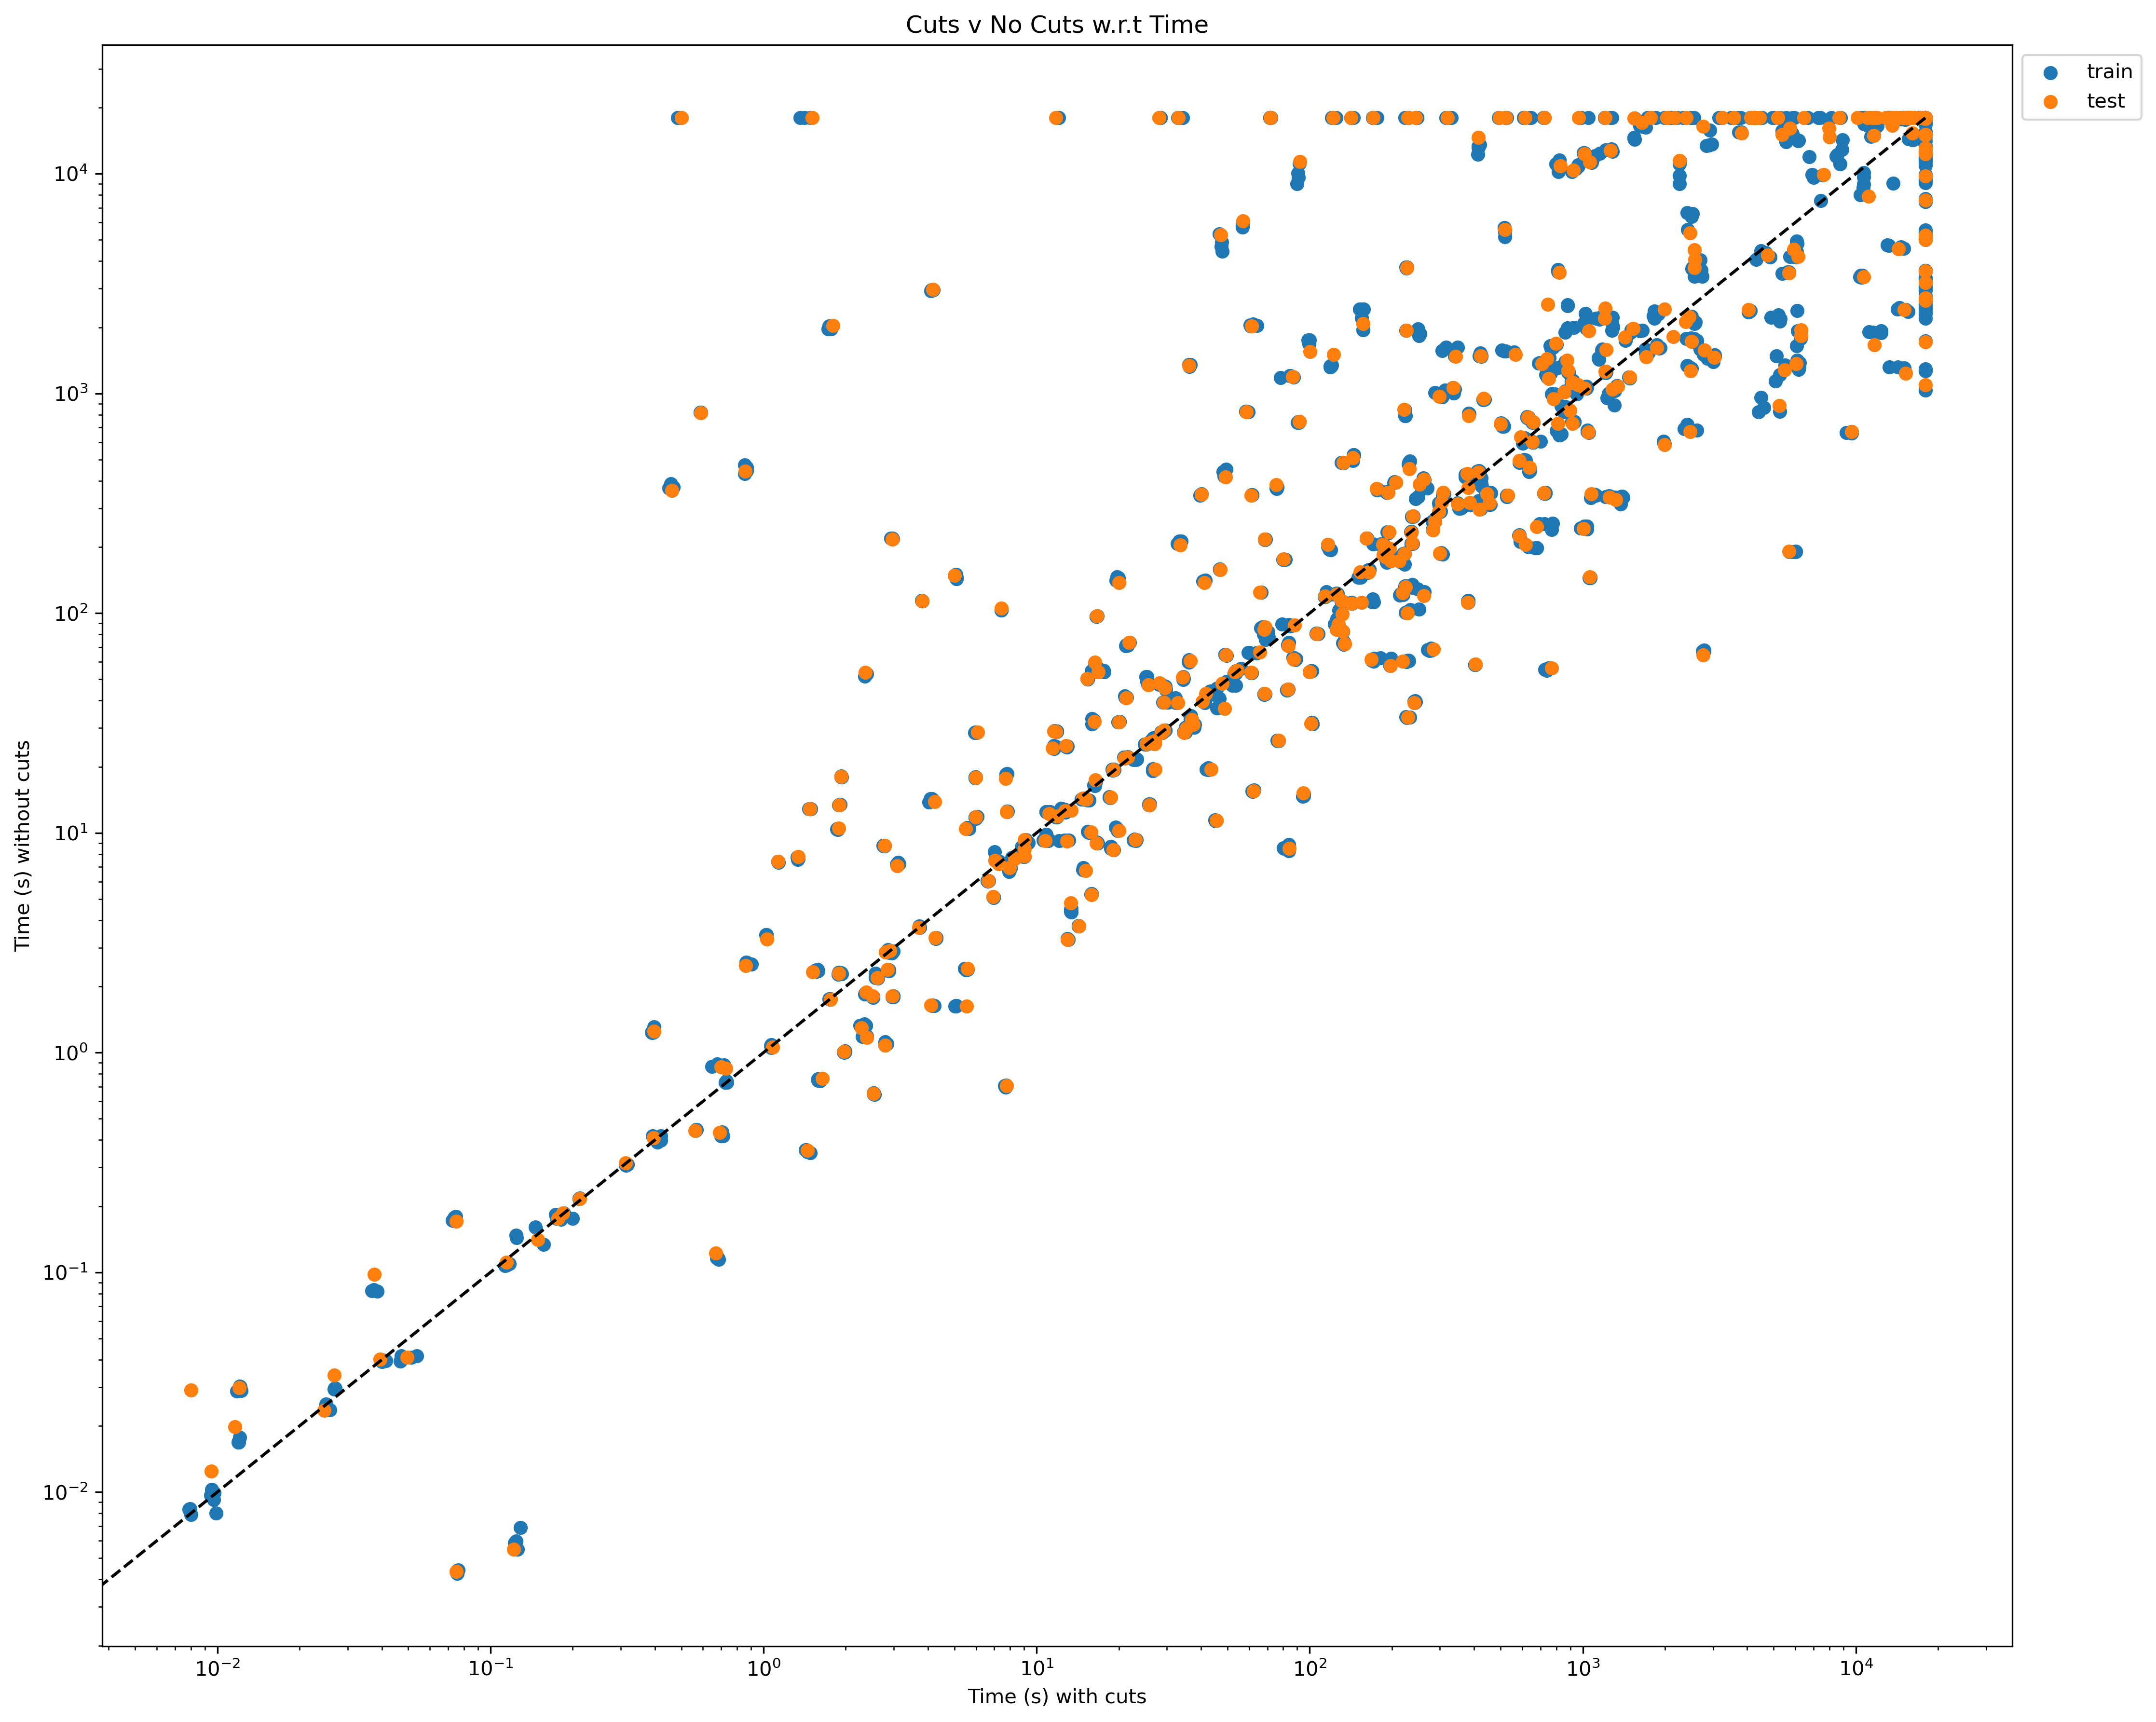

<Figure size 432x288 with 0 Axes>

In [308]:
minx = 0
maxx = 18000

plt.figure(figsize=(15,12), dpi=300)
plt.scatter(x=train['TIME W/ CUTS'], y=train['TIME W/O CUTS'])
plt.scatter(x=test['TIME W/ CUTS'], y=test['TIME W/O CUTS'])
plt.legend(["train" , "test"], bbox_to_anchor = (1 , 1))

plt.plot(range(int(minx),int(maxx)),range(int(minx),int(maxx)),'--', color='black')

plt.title('Cuts v No Cuts w.r.t Time')
plt.xlabel('Time (s) with cuts')
plt.ylabel('Time (s) without cuts')



fig = plt.gcf()

ax_list=fig.axes
ax=ax_list[0]
ax.set_xscale("log")
ax.set_yscale("log")
plt.tight_layout()
plt.show()
plt.draw()
fname = "plot"
fig.savefig(fname, dpi=300)

In [219]:
train_feat = train.drop(['RANDOM SEED', 'TIME W/ CUTS', 'NODES W/ CUTS', 
                    'TIME W/O CUTS', 'NODES W/O CUTS'], axis=1)
test_feat = test.drop(['RANDOM SEED', 'TIME W/ CUTS', 'NODES W/ CUTS', 
                  'TIME W/O CUTS', 'NODES W/O CUTS'], axis=1)

In [220]:
# Import ML Libraries
from collections import OrderedDict
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_X_y

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [221]:
X_train = train_feat.drop(['NAME', 'Time Label', 'Nodes Label'], axis=1)
# X_train = X_train.astype(np.float64)

y_train = train_feat.filter(['Time Label'])
# y_train = y_train.astype(np.float64)

X_test = test_feat.drop(['NAME', 'Time Label', 'Nodes Label'], axis=1)
# X_test = X_test.astype(np.float64)

y_test = test_feat.filter(['Time Label'])
# y_test = y_test.astype(np.float64)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1704, 20) (1704, 1)
(426, 20) (426, 1)


In [222]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [223]:
#  Random Forest
# target_names = ['-1', '1']
# clf = RandomForestClassifier(max_depth = 20, n_estimators = 200, random_state = 123)
# clf.fit(X_train, y_train)
# y_train_pred = clf.predict(X_train)
# y_test_pred = clf.predict(X_test)
# score = clf.score(X_test, y_test)
# mse_train = mean_squared_error(y_train, y_train_pred)
# mse_test = mean_squared_error(y_test, y_test_pred)
# print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
# print("Accuracy score: {}\n".format(score))
# print(classification_report(y_test, y_test_pred, target_names=target_names))

In [225]:
# Feature Selection
cols = train_feat.drop(['NAME', 'Time Label', 'Nodes Label'], axis=1)

bestfeatures = SelectKBest(score_func=f_classif, k = 'all')
fit = bestfeatures.fit(X_train,y_train)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(cols.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score')) #print best features
data=featureScores.nlargest(20,'Score')

             Features      Score
16          nonzeroes  20.519396
10     lincard_constr  12.570489
1     PRESOLVING TIME   6.677581
0          INITIAL LP   4.891050
15   linmixbin_constr   3.731441
12  linbinpack_constr   2.888891
7   linsetpart_constr   2.867045
3            bin_vars   1.756245
17        presol_vars   1.736406
8   linsetpack_constr   1.505543
2                vars   1.459435
5           cont_vars   1.311371
4            int_vars   1.084470
14  linintknap_constr   0.288878
9    linsetcov_constr   0.174119
18    presol_int_vars   0.089224
13    linknaps_constr   0.017675
6              constr   0.001280
19      presol_constr   0.000406
11   lineqknap_constr   0.000046


C:\Users\ambar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<AxesSubplot:ylabel='Features'>

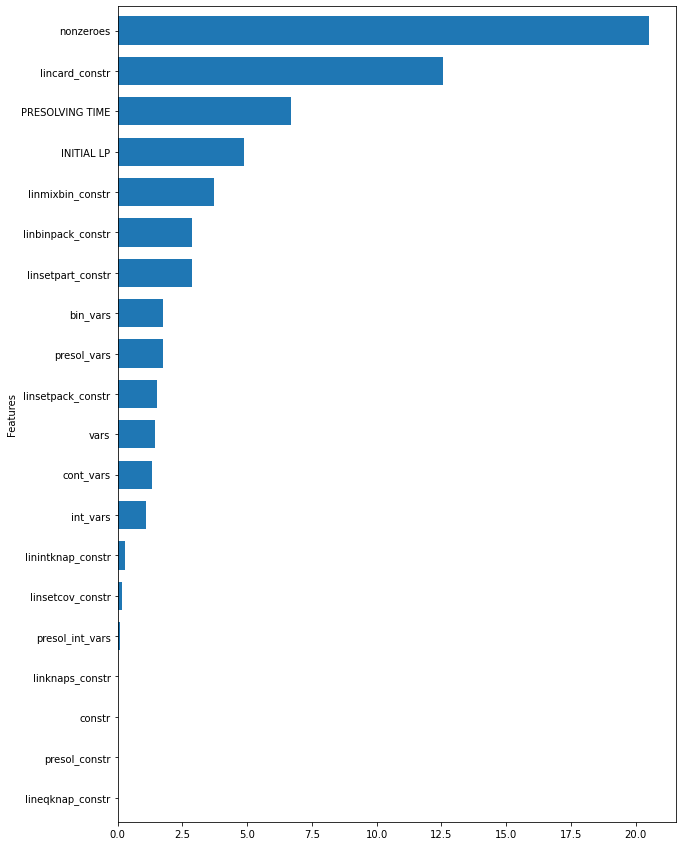

In [269]:

features = data.copy().set_index('Features') 
features = features.iloc[::-1]
features.plot.barh(width = 0.7, figsize=(10,15), legend=None)

In [261]:
X_train = train_feat.drop(['NAME', 'Time Label', 'Nodes Label', 'constr', 'lineqknap_constr', 'linknaps_constr', 
                          'presol_int_vars', 'presol_constr', 'vars', 'cont_vars', 'int_vars', 'linintknap_constr',
                          'linsetcov_constr'], axis=1)

y_train = train_feat.filter(['Time Label'])

X_test = test_feat.drop(['NAME', 'Time Label', 'Nodes Label', 'constr', 'lineqknap_constr', 'linknaps_constr', 
                          'presol_int_vars', 'presol_constr', 'vars', 'cont_vars', 'int_vars', 'linintknap_constr',
                          'linsetcov_constr'], axis=1)

y_test = test_feat.filter(['Time Label'])

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1704, 10) (1704, 1)
(426, 10) (426, 1)


In [33]:
model_params={'svm':{'model': SVC(kernel = 'rbf', random_state = 0), 
                    'params':{'C':[10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]
                             }
                    },
              'rfm':{'model': RandomForestClassifier(random_state = 0), 
                    'params':{'n_estimators':[100, 200, 500], 
                             'max_depth':[5, 10, 15]
                             }
                    },
              'lrm':{'model': LogisticRegression(solver='lbfgs', random_state = 0), 
                    'params':{'C':[10, 100, 1000], 
                              'max_iter':[100, 500, 1000]
                             }
                    },
              'et':{'model': ExtraTreesClassifier(random_state=0), 
                    'params':{'n_estimators': [100, 200, 500], 
                              'max_depth': [5, 10, 15]
                             }
                    },
              'nn':{'model': MLPClassifier(solver='lbfgs', batch_size='auto', learning_rate='constant', 
                                           power_t=0.5, max_iter=500, shuffle=True, tol=0.00001, verbose=True, 
                                           early_stopping=False, validation_fraction=0.1, random_state=0),
                    'params':{'hidden_layer_sizes': [(5, ), (10, ), (15, )],
                                 'learning_rate_init': [1e-1, 1e-2, 1e-3],
                                 'alpha':  [1e-2, 1e-3, 1e-4],
                                 'activation': ['tanh', 'relu', 'logistic']
                             }
                    }
             }
scores=[]
for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'], mp['params'], cv = None, return_train_score = False, n_jobs = -1)
    clf.fit(X_train, y_train)
    scores.append({'model': model_name, 'best_score':clf.best_score_, 'best_params':clf.best_params_})

C:\Users\ambar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ambar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\ambar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ambar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_

In [35]:
scores=pd.DataFrame(scores).sort_values(by = ['best_score'], ascending = False)
scores.to_csv('scores.csv')

In [166]:
scores = OrderedDict()
target_names = ['-1', '1']

print('SUPPORT VECTOR MACHINES')
clf = SVC(random_state = 0, C = 100, gamma = 0.001, kernel = 'rbf')
clf.fit(X_train, y_train)
y_train_pred_svm = clf.predict(X_train)
y_test_pred_svm = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_svm)
mse_test = mean_squared_error(y_test, y_test_pred_svm)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_svm, target_names=target_names))
scores['SVC'] = [score, metrics.precision_score(y_test, y_test_pred_svm), metrics.recall_score(y_test, y_test_pred_svm),
                      metrics.f1_score(y_test, y_test_pred_svm), mse_test, mse_train]

print('##################################')
print('NEURAL NETWORKS')
clf = MLPClassifier(solver='lbfgs', batch_size='auto', learning_rate='constant', power_t=0.5, max_iter=500, 
                    shuffle=True, tol=0.00001, verbose=True, 
                    early_stopping=False, validation_fraction=0.1,
                    hidden_layer_sizes=(5, ), activation='tanh', alpha=0.01, 
                    learning_rate_init=0.1, random_state=0)
clf.fit(X_train, y_train)
y_train_pred_nn = clf.predict(X_train)
y_test_pred_nn = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_nn)
mse_test = mean_squared_error(y_test, y_test_pred_nn)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_nn, target_names=target_names))
scores['NN'] = [score, metrics.precision_score(y_test, y_test_pred_nn), metrics.recall_score(y_test, y_test_pred_nn),
                      metrics.f1_score(y_test, y_test_pred_nn), mse_test, mse_train]

print('##################################')
print('DECISION TREES')
clf = ExtraTreesClassifier(random_state=0, max_depth = 15, n_estimators = 200)
clf.fit(X_train, y_train)
y_train_pred_et = clf.predict(X_train)
y_test_pred_et = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_et)
mse_test = mean_squared_error(y_test, y_test_pred_et)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_et, target_names=target_names))
scores['ET'] = [score, metrics.precision_score(y_test, y_test_pred_et), 
                         metrics.recall_score(y_test, y_test_pred_et), 
                         metrics.f1_score(y_test, y_test_pred_et), mse_test, mse_train]

print('##################################')
print('LOGISTIC REGRESSION')
clf = LogisticRegression(solver='lbfgs', random_state = 0, C = 10, max_iter = 100)
clf.fit(X_train, y_train)
y_train_pred_lr = clf.predict(X_train)
y_test_pred_lr = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_lr)
mse_test = mean_squared_error(y_test, y_test_pred_lr)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_lr, target_names=target_names))
scores['LR'] = [score, metrics.precision_score(y_test, y_test_pred_lr), metrics.recall_score(y_test, y_test_pred_lr),
                      metrics.f1_score(y_test, y_test_pred_lr), mse_test, mse_train]

print('##################################')
print('RANDOM FOREST')
clf = RandomForestClassifier(random_state = 0, max_depth = 15, n_estimators = 100 )
clf.fit(X_train, y_train)
y_train_pred_rf = clf.predict(X_train)
y_test_pred_rf = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_rf)
mse_test = mean_squared_error(y_test, y_test_pred_rf)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_rf, target_names=target_names))
scores['RF'] = [score, metrics.precision_score(y_test, y_test_pred_rf), metrics.recall_score(y_test, y_test_pred_rf),
                      metrics.f1_score(y_test, y_test_pred_rf), mse_test, mse_train]

SUPPORT VECTOR MACHINES


C:\Users\ambar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE Test: 0.5821596244131455, MSE Train: 0.4694835680751174
Accuracy score: 0.8544600938967136

              precision    recall  f1-score   support

          -1       0.79      0.90      0.85       188
           1       0.92      0.82      0.86       238

    accuracy                           0.85       426
   macro avg       0.85      0.86      0.85       426
weighted avg       0.86      0.85      0.85       426

##################################
NEURAL NETWORKS


C:\Users\ambar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ambar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
<ipython-input-166-bc0f90a240dc>:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


MSE Test: 1.5586854460093897, MSE Train: 1.539906103286385
Accuracy score: 0.6103286384976526

              precision    recall  f1-score   support

          -1       0.61      0.31      0.42       188
           1       0.61      0.84      0.71       238

    accuracy                           0.61       426
   macro avg       0.61      0.58      0.56       426
weighted avg       0.61      0.61      0.58       426

##################################
DECISION TREES
MSE Test: 0.29107981220657275, MSE Train: 0.22065727699530516
Accuracy score: 0.9272300469483568

              precision    recall  f1-score   support

          -1       0.96      0.87      0.91       188
           1       0.90      0.97      0.94       238

    accuracy                           0.93       426
   macro avg       0.93      0.92      0.93       426
weighted avg       0.93      0.93      0.93       426

##################################
LOGISTIC REGRESSION
MSE Test: 2.2347417840375585, MSE Train: 2.19014

C:\Users\ambar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ambar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ambar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

MSE Test: 0.12206572769953052, MSE Train: 0.009389671361502348
Accuracy score: 0.9694835680751174

              precision    recall  f1-score   support

          -1       0.94      0.99      0.97       188
           1       0.99      0.95      0.97       238

    accuracy                           0.97       426
   macro avg       0.97      0.97      0.97       426
weighted avg       0.97      0.97      0.97       426



In [167]:
scores_df = pd.DataFrame.from_dict(scores, orient='index')
scores_df.columns=['accuracy', 'precision', 'recall', 'f1-score', 'mse test', 'mse train']
scores_df

,accuracy,precision,recall,f1-score,mse test,mse train
SVC,0.854460,0.915094,0.815126,0.862222,0.582160,0.469484
NN,0.610329,0.609091,0.844538,0.707746,1.558685,1.539906
ET,0.927230,0.902724,0.974790,0.937374,0.291080,0.220657
LR,0.441315,0.000000,0.000000,0.000000,2.234742,2.190141
RF,0.969484,0.991266,0.953782,0.972163,0.122066,0.009390


Text(0.5, 1.0, 'MSE')

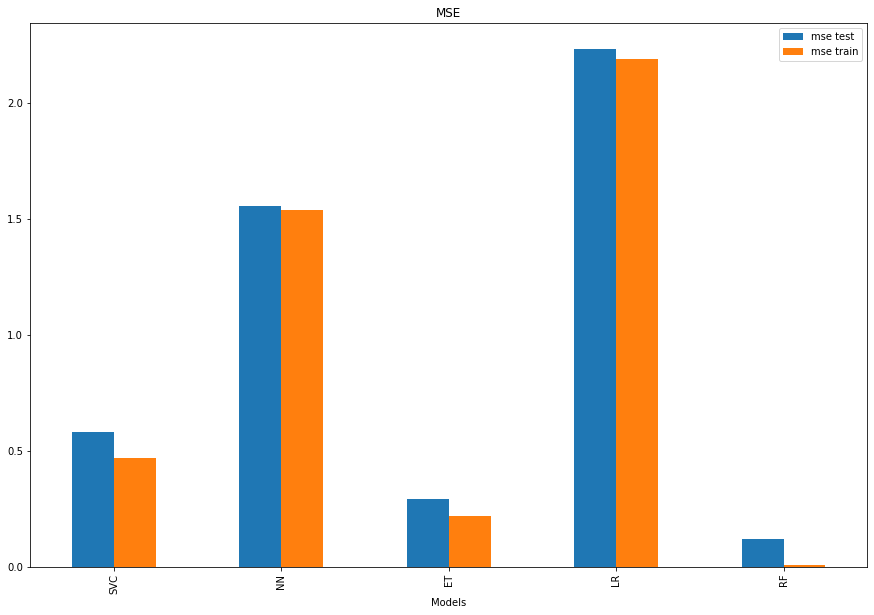

In [188]:
errors_df = scores_df.filter(['mse test', 'mse train'])
errors_df.plot.bar(width = 0.5, figsize=(15,10))
plt.xlabel("Models")
plt.title('MSE')

Text(0.5, 1.0, 'Accuracy Score')

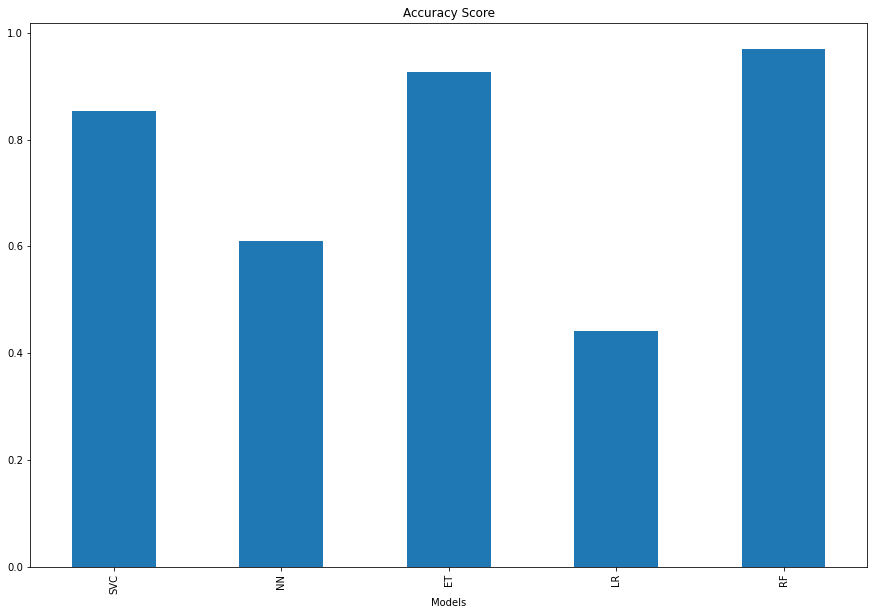

In [192]:
accuracy_df = scores_df.filter(['accuracy'])
accuracy_df.plot.bar(width = 0.5, figsize=(15,10), legend = None)
plt.xlabel("Models")
plt.title('Accuracy Score')

In [132]:
# Predicted Labels

pred = test_feat.copy()
pred['PLabel SVM'] = y_test_pred_svm
pred['PLabel ET'] = y_test_pred_et
pred['PLabel RF'] = y_test_pred_rf
ml_3 = analysis_set_3.merge(pred, on = "NAME", how = "left")
ml_3 = ml_3.filter(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS',
                   'NODES W/ CUTS', 'NODES W/O CUTS', 'Minimum Time', 
                    'Minimum Nodes', 'PLabel SVM', 'PLabel ET', 'PLabel RF'])
ml_3

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,Minimum Time,Minimum Nodes,PLabel SVM,PLabel ET,PLabel RF
0,10teams.mps.gz,2,11.088517,12.212530,30,276,11.088517,30,1,1,1
1,10teams.mps.gz,4,11.186637,12.444448,30,276,11.186637,30,1,1,1
2,10teams.mps.gz,8,11.044666,12.331489,30,276,11.044666,30,1,1,1
3,10teams.mps.gz,16,10.835616,12.467186,30,276,10.835616,30,1,1,1
4,10teams.mps.gz,32,10.833424,12.477946,30,276,10.833424,30,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2125,wachplan.mps.gz,2,1427.930347,1801.604630,67520,98056,1427.930347,67520,1,1,1
2126,wachplan.mps.gz,4,1444.662760,1804.842432,67520,98056,1444.662760,67520,1,1,1
2127,wachplan.mps.gz,8,1431.659624,1737.152014,67520,98056,1431.659624,67520,1,1,1
2128,wachplan.mps.gz,16,1433.459125,1758.587956,67520,98056,1433.459125,67520,1,1,1


In [138]:
# Predicted Time and Nodes

rf_pred_time = []
rf_pred_nodes = []        
for index, row in ml_3.iterrows():
    if row['PLabel RF'] == 1.0:
        rf_pred_time.append(row['TIME W/ CUTS'])
        rf_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel RF'] == -1.0:
        rf_pred_time.append(row['TIME W/O CUTS'])
        rf_pred_nodes.append(row['NODES W/O CUTS'])

svm_pred_time = []
svm_pred_nodes = []        
for index, row in ml_3.iterrows():
    if row['PLabel SVM'] == 1.0:
        svm_pred_time.append(row['TIME W/ CUTS'])
        svm_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel SVM'] == -1.0:
        svm_pred_time.append(row['TIME W/O CUTS'])
        svm_pred_nodes.append(row['NODES W/O CUTS'])

et_pred_time = []
et_pred_nodes = []        
for index, row in ml_3.iterrows():
    if row['PLabel ET'] == 1.0:
        et_pred_time.append(row['TIME W/ CUTS'])
        et_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel ET'] == -1.0:
        et_pred_time.append(row['TIME W/O CUTS'])
        et_pred_nodes.append(row['NODES W/O CUTS'])

        
ml_3['PTime RF'] = rf_pred_time
ml_3['PTime SVM'] = svm_pred_time
ml_3['PTime ET'] = et_pred_time

ml_3['PNodes RF'] = rf_pred_nodes
ml_3['PNodes SVM'] = svm_pred_nodes
ml_3['PNodes ET'] = et_pred_nodes

ml_3

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,Minimum Time,Minimum Nodes,PLabel SVM,PLabel ET,PLabel RF,PTime RF,PTime SVM,PTime ET,PNodes RF,PNodes SVM,PNodes ET
0,10teams.mps.gz,2,11.088517,12.212530,30,276,11.088517,30,1,1,1,11.088517,11.088517,11.088517,30,30,30
1,10teams.mps.gz,4,11.186637,12.444448,30,276,11.186637,30,1,1,1,11.186637,11.186637,11.186637,30,30,30
2,10teams.mps.gz,8,11.044666,12.331489,30,276,11.044666,30,1,1,1,11.044666,11.044666,11.044666,30,30,30
3,10teams.mps.gz,16,10.835616,12.467186,30,276,10.835616,30,1,1,1,10.835616,10.835616,10.835616,30,30,30
4,10teams.mps.gz,32,10.833424,12.477946,30,276,10.833424,30,1,1,1,10.833424,10.833424,10.833424,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,wachplan.mps.gz,2,1427.930347,1801.604630,67520,98056,1427.930347,67520,1,1,1,1427.930347,1427.930347,1427.930347,67520,67520,67520
2126,wachplan.mps.gz,4,1444.662760,1804.842432,67520,98056,1444.662760,67520,1,1,1,1444.662760,1444.662760,1444.662760,67520,67520,67520
2127,wachplan.mps.gz,8,1431.659624,1737.152014,67520,98056,1431.659624,67520,1,1,1,1431.659624,1431.659624,1431.659624,67520,67520,67520
2128,wachplan.mps.gz,16,1433.459125,1758.587956,67520,98056,1433.459125,67520,1,1,1,1433.459125,1433.459125,1433.459125,67520,67520,67520


In [139]:
avg_bb_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut','No Cut', 'Perfect', 'RF', 'ET', 'SVM']],
                                    names=['Parameter','Setting'])

bb_row_names = pd.MultiIndex.from_product(
    [bb_classes, bb_buckets],
    names=['Metric', 'Bucket'])

avg_bb_df = pd.DataFrame(
    index = bb_row_names,
    dtype = float)

avg_bb_df = pd.DataFrame(
    columns = avg_bb_cols,
    index = bb_row_names,
    dtype = float)

In [140]:
df_0 = ml_3[(ml_3['Minimum Time'] >= 0)]
df_10 = ml_3[(ml_3['Minimum Time'] >= 10)]
df_100 = ml_3[(ml_3['Minimum Time'] >= 100)]
df_1000 = ml_3[(ml_3['Minimum Time'] >= 1000)]
df_3600 = ml_3[(ml_3['Minimum Time'] >= 3600)]

In [141]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_svm = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_svm = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_svm = data['PTime SVM'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_svm = [i + SHIFT_TIME for i in time_svm]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_svm = geometric_mean(timeshift_svm) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_svm.append(time_geom_svm)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_svm = data['PNodes SVM'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_svm = [i + SHIFT_NODES for i in nodes_svm]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_svm = geometric_mean(nodeshift_svm) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_svm.append(nodes_geom_svm)
    
    instances.append(len(data))

[5445.327576643813,
 9380.627980845082,
 17831.10756253661,
 55172.62091384982,
 94335.74635378602]

In [142]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts

avg_bb_df[('Time', 'RF')] = t_rf
avg_bb_df[('Time', 'ET')] = t_et
avg_bb_df[('Time', 'SVM')] = t_svm

avg_bb_df[('Time', 'Perfect')] = t_perfect

avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts

avg_bb_df[('Node', 'RF')] = n_rf
avg_bb_df[('Node', 'ET')] = n_et
avg_bb_df[('Node', 'SVM')] = n_svm

avg_bb_df[('Node', 'Perfect')] = n_perfect

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       343.445870    517.326676   270.711792   
               [10,18000)      637.969455    953.611882   483.251293   
               [100,18000)    1581.690168   2227.952373  1170.680885   
               [1000,18000)   5765.241156   6863.840991  4103.873453   
               [3600,18000)  11111.216531  13476.412604  9376.142775   

Parameter                                                           \
Setting                               RF           ET          SVM   
Metric         Bucket                                                
Geometric Mean [0,18000)      271.224257   277.897927   301.094188   
               [10,18000)     484.339969   498.299188   543.296787   
               [100,18000)   1174.186218  1214.336561  1320.408378   
               [1000,18000)  4111.493634  4339.966951  4322.149265   
               [3600,18000)  9410.648327  9726.019463  9657.780987   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4508.617322   14227.825971   3936.705655   
               [10,18000)     7828.473820   24587.907419   6662.397024   
               [100,18000)   14366.833668   39263.733839  12025.236283   
               [1000,18000)  48172.979592  115685.056639  37929.815249   
               [3600,18000)  68902.582826  163629.436186  55215.984283   

Parameter                                                              \
Setting                                RF            ET           SVM   
Metric         Bucket                                                   
Geometric Mean [0,18000)      4587.906449   4590.882361   5445.327577   
               [10,18000)     7900.018450   7919.933956   9380.627981   
               [100,18000)   14937.604148  14916.615004  17831.107563   
               [1000,18000)  50070.471825  50348.931309  55172.620914   
               [3600,18000)  86181.300420  85763.001311  94335.746354   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)         2130  
               [10,18000)        1640  
               [100,18000)       1110  
               [1000,18000)       543  
               [3600,18000)       272

In [151]:
best_time = []
best_nodes = []

zip_time = zip(t_rf, t_et, t_svm)
zip_time = list(zip_time)

zip_nodes = zip(n_rf, n_et, n_svm)
zip_nodes = list(zip_nodes)

for i in zip_time:
    best_time.append(min(i))

for i in zip_nodes:
    best_nodes.append(min(i))

In [152]:
imp_time = []
imp_nodes = []

for i, j in zip(best_time, t_cuts):
    imp = ((i - j)/j) * 100
    imp_time.append(imp)
    
for i, j in zip(best_nodes, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes.append(imp)

# imp_time    
# imp_nodes

In [153]:
avg_bb_df[('Improvement (%)', 'Time')] = imp_time
avg_bb_df[('Improvement (%)', 'Nodes')] = imp_nodes

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       343.445870    517.326676   270.711792   
               [10,18000)      637.969455    953.611882   483.251293   
               [100,18000)    1581.690168   2227.952373  1170.680885   
               [1000,18000)   5765.241156   6863.840991  4103.873453   
               [3600,18000)  11111.216531  13476.412604  9376.142775   

Parameter                                                           \
Setting                               RF           ET          SVM   
Metric         Bucket                                                
Geometric Mean [0,18000)      271.224257   277.897927   301.094188   
               [10,18000)     484.339969   498.299188   543.296787   
               [100,18000)   1174.186218  1214.336561  1320.408378   
               [1000,18000)  4111.493634  4339.966951  4322.149265   
               [3600,18000)  9410.648327  9726.019463  9657.780987   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4508.617322   14227.825971   3936.705655   
               [10,18000)     7828.473820   24587.907419   6662.397024   
               [100,18000)   14366.833668   39263.733839  12025.236283   
               [1000,18000)  48172.979592  115685.056639  37929.815249   
               [3600,18000)  68902.582826  163629.436186  55215.984283   

Parameter                                                              \
Setting                                RF            ET           SVM   
Metric         Bucket                                                   
Geometric Mean [0,18000)      4587.906449   4590.882361   5445.327577   
               [10,18000)     7900.018450   7919.933956   9380.627981   
               [100,18000)   14937.604148  14916.615004  17831.107563   
               [1000,18000)  50070.471825  50348.931309  55172.620914   
               [3600,18000)  86181.300420  85763.001311  94335.746354   

Parameter                   Instances Improvement (%)             
Setting                                          Time      Nodes  
Metric         Bucket                                             
Geometric Mean [0,18000)         2130      -21.028529   1.758613  
               [10,18000)        1640      -24.081010   0.913903  
               [100,18000)       1110      -25.763829   3.826740  
               [1000,18000)       543      -28.684794   3.938914  
               [3600,18000)       272      -15.304969  24.469937

In [154]:
print(avg_bb_df.to_latex())

\begin{tabular}{llrrrrrrrrrrrrrrr}
\toprule
               & Parameter & \multicolumn{6}{l}{Time} & \multicolumn{6}{l}{Node} & Instances & \multicolumn{2}{l}{Improvement (\%)} \\
               & Setting &           Cut &        No Cut &      Perfect &           RF &           ET &          SVM &           Cut &         No Cut &       Perfect &            RF &            ET & \multicolumn{2}{l}{SVM} &            Time &      Nodes \\
Metric & Bucket &               &               &              &              &              &              &               &                &               &               &               &               &           &                 &            \\
\midrule
Geometric Mean & [0,18000) &    343.445870 &    517.326676 &   270.711792 &   271.224257 &   277.897927 &   301.094188 &   4508.617322 &   14227.825971 &   3936.705655 &   4587.906449 &   4590.882361 &   5445.327577 &      2130 &      -21.028529 &   1.758613 \\
               & [10,18000) &    637.9694

In [155]:
train_test_classes = ['Geometric Mean']
# num_bb_classes = len(bb_classes)
train_test_sets = ['Train Set', 'Test Set']


In [156]:
train_test_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut', 'Perfect', 'RF', 'ET', 'SVM']],
                                    names=['Parameter','Setting'])

train_test_row_names = pd.MultiIndex.from_product(
    [train_test_classes, train_test_sets],
    names=['Metric', 'Set'])

train_test_df = pd.DataFrame(
    index = train_test_row_names,
    dtype = float)

train_test_df = pd.DataFrame(
    columns = train_test_cols,
    index = train_test_row_names,
    dtype = float)

In [157]:
train_test_df

Parameter                Time                     Node                    
Setting                   Cut Perfect  RF  ET SVM  Cut Perfect  RF  ET SVM
Metric         Set                                                        
Geometric Mean Train Set  NaN     NaN NaN NaN NaN  NaN     NaN NaN NaN NaN
               Test Set   NaN     NaN NaN NaN NaN  NaN     NaN NaN NaN NaN

In [158]:
train_df = ml_3.copy()
train_df = train_df[train_df['RANDOM SEED'] != 2]
test_df = ml_3.copy()
test_df = test_df[test_df['RANDOM SEED'] == 2]

In [159]:
df = [train_df, test_df]

t_cuts = []
t_perfect = []
t_rf = []
t_et = []
t_svm = []

n_cuts = []
n_perfect = []
n_rf = []
n_et = []
n_svm = []

instances = []

for data in df:
    
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_svm = data['PTime SVM'].tolist()
    
    
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_svm = [i + SHIFT_TIME for i in time_svm]
    
    
    
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_svm = geometric_mean(timeshift_svm) - SHIFT_TIME
    
    
    
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_svm.append(time_geom_svm)
    
    
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_svm = data['PNodes SVM'].tolist()
    
    
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_svm = [i + SHIFT_NODES for i in nodes_svm]
    
    
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_svm = geometric_mean(nodeshift_svm) - SHIFT_NODES
    
    
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_svm.append(nodes_geom_svm)
    
    instances.append(len(data))

In [160]:
# train_test_df['Instances'] = instances

train_test_df[('Time', 'Cut')] = t_cuts

train_test_df[('Time', 'RF')] = t_rf
train_test_df[('Time', 'ET')] = t_et
train_test_df[('Time', 'SVM')] = t_svm

train_test_df[('Time', 'Perfect')] = t_perfect

train_test_df[('Node', 'Cut')] = n_cuts

train_test_df[('Node', 'RF')] = n_rf
train_test_df[('Node', 'ET')] = n_et
train_test_df[('Node', 'SVM')] = n_svm

train_test_df[('Node', 'Perfect')] = n_perfect

train_test_df

Parameter                       Time                                      \
Setting                          Cut     Perfect          RF          ET   
Metric         Set                                                         
Geometric Mean Train Set  343.425777  270.741354  271.173314  278.054031   
               Test Set   343.526252  270.593571  271.428107  277.274230   

Parameter                                    Node                            \
Setting                          SVM          Cut      Perfect           RF   
Metric         Set                                                            
Geometric Mean Train Set  301.021442  4509.355733  3936.658022  4587.779525   
               Test Set   301.385317  4505.664668  3936.896192  4588.414172   

Parameter                                           
Setting                            ET          SVM  
Metric         Set                                  
Geometric Mean Train Set  4590.616258  5446.397399  
               Test Set   4591.946903  5441.050064

In [161]:
best_time = []
best_nodes = []

zip_time = zip(t_rf, t_et, t_svm)
zip_time = list(zip_time)

zip_nodes = zip(n_rf, n_et, n_svm)
zip_nodes = list(zip_nodes)

for i in zip_time:
    best_time.append(min(i))

for i in zip_nodes:
    best_nodes.append(min(i))

In [162]:
imp_time = []
imp_nodes = []

for i, j in zip(best_time, t_cuts):
    imp = ((i - j)/j) * 100
    imp_time.append(imp)
    
for i, j in zip(best_nodes, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes.append(imp)

In [163]:
train_test_df[('Improvement (%)', 'Time')] = imp_time
train_test_df[('Improvement (%)', 'Nodes')] = imp_nodes

train_test_df

Parameter                       Time                                      \
Setting                          Cut     Perfect          RF          ET   
Metric         Set                                                         
Geometric Mean Train Set  343.425777  270.741354  271.173314  278.054031   
               Test Set   343.526252  270.593571  271.428107  277.274230   

Parameter                                    Node                            \
Setting                          SVM          Cut      Perfect           RF   
Metric         Set                                                            
Geometric Mean Train Set  301.021442  4509.355733  3936.658022  4587.779525   
               Test Set   301.385317  4505.664668  3936.896192  4588.414172   

Parameter                                          Improvement (%)            
Setting                            ET          SVM            Time     Nodes  
Metric         Set                                                            
Geometric Mean Train Set  4590.616258  5446.397399      -21.038742  1.739135  
               Test Set   4591.946903  5441.050064      -20.987667  1.836566